# Neural Network - Multi class classification

### Simple Neural Network for multi-class classification, from scratch in Python

source: https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

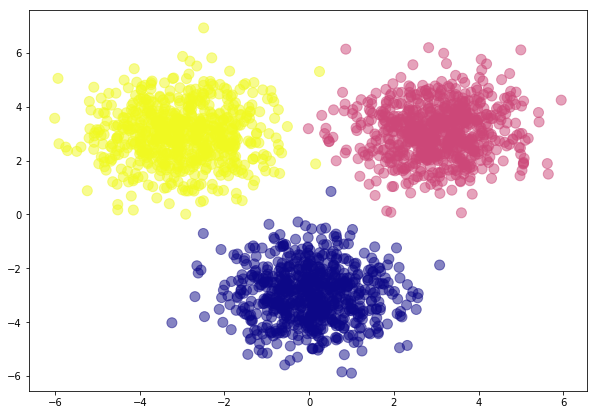

In [8]:
np.random.seed(42)

cat_images = np.random.randn(700, 2) + np.array([0, -3])
mouse_images = np.random.randn(700, 2) + np.array([3, 3])
dog_images = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([cat_images, mouse_images, dog_images])
labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):
    one_hot_labels[i, labels[i]] = 1
    
plt.figure(figsize=(10, 7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1-sigmoid(x))

#activation function for NN with multi-class clasification
def softmax(A):
    expA = np.exp(A)
    return expA/expA.sum(axis=1, keepdims=True)

In [15]:
instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 4
output_labels = 3

wh = np.random.rand(attributes, hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes, output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

In [20]:
error_cost = []

#for epoch in range(50000):
    #feedforward
    #phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)
    
    #phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)
    
    #Back Propagation
    #phase 1
    dao = ao - one_hot_labels
    dcost_wo = np.dot(ah.T, dao)
    
    #phase 2
    dcost_dah = np.dot(dao, wo.T)
    dzh = sigmoid_der(zh)
    dcost_wh = np.dot(feature_set.T, dzh * dcost_dah)
    
    #bias
    dcost_bh = dcost_dah + dzh
    
    #update weights
    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)
    
    wo -= lr * dcost_wo
    bo -= lr * dao.sum(axis=0)
    
    #error using cross-entropy function, just to see error reduction
    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        
        print('Loss function value: ', loss)
        error_cost.append(loss)

Loss function value:  14.758278574653417
Loss function value:  14.757771039436587
Loss function value:  14.757266694953868
Loss function value:  14.756765510907904
Loss function value:  14.756267457406114
Loss function value:  14.75577250495307
Loss function value:  14.755280624445128
Loss function value:  14.754791787163203
Loss function value:  14.754305964765752
Loss function value:  14.753823129283436
Loss function value:  14.75334325311244
Loss function value:  14.752866309009047
Loss function value:  14.752392270082455
Loss function value:  14.75192110978998
Loss function value:  14.75145280193135
Loss function value:  14.750987320643024
Loss function value:  14.75052464039194
Loss function value:  14.750064735971549
Loss function value:  14.749607582495111
Loss function value:  14.74915315539166
Loss function value:  14.748701430400637
Loss function value:  14.748252383566378
Loss function value:  14.747805991233918
Loss function value:  14.747362230043901
Loss function value:  